In [ ]:
import jieba.analyse,csv,os,re
from jieba import analyse

lines = 0
stopwords = {}.fromkeys([line.rstrip() for line in open('Stopword.txt', encoding='utf-8')])
reader = csv.reader(open("人民日报.csv", "r", encoding='utf-8'))
fo = open("weibo_jieba.csv", "a+", encoding='utf-8')
fo.write('weibo')
fo.write('\n')
for item in reader:  # 读取每一行
    if item[2] == '原始图片url':  # 判断头行
        continue

    lines += 1  # 提示进程
    if lines % 10000 == 0:
        print('处理', lines, '条')
    text = item[1]  # 选择评论数据
    text = re.sub(r'\d', "", text)

    seg = jieba.cut(text)

    result = []
    for i in seg:  # 去停用词
        if i not in stopwords:
            result.append(i)
    fo = open("weibo_jieba.csv", "a+", encoding='utf-8')
    for j in result:
        fo.write(j)
        fo.write(' ')

    fo.write('\n')
    fo.close()

In [43]:
import pandas as pd

df = pd.read_csv('weibo_jieba.csv',encoding='utf-8')
df.head()

,weibo
0,方舱 医院 唱起 祖国 日晚 武昌 方舱 医院 一名 患者 唱起 青藏高原 迎来 满堂喝彩 ...
1,武汉 方舱 医院 未来 天 开放 张 床位 日 武汉市 新冠 肺炎 疫情 防控 指挥部 武汉...
2,疫情 面前 还好 疫情 期 擦肩而过 一方平安 万家 心安 外卖 小哥 执勤 民警 社区 大...
3,新冠 肺炎 最新 数据 连降 湖北 新增 确诊 持续 下降 信息 重视 湖北 新增 病例 连...
4,新冠 病毒 高清 彩照 曝光 新冠 病毒 长 美国 国家 过敏 传染病 研究所 落基山 实验...


In [44]:
df2 = pd.read_csv('人民日报.csv')
df2.head()

,微博id,weibo,原始图片url,发布位置,发布时间,发布工具,点赞数,转发数,评论数,Label,Label.1
0,Iuw1wpJWh,【#方舱医院唱起我和我的祖国#】16日晚，在武昌方舱医院，一名患者唱起《青藏高原》，迎来满堂...,无,无,2020/2/16 22:59,微博视频,2842,151,455,7_期盼战胜疫情,7
1,IuvJTmldU,【武汉#方舱医院未来3天开放13001张床位#】16日，据武汉市新冠肺炎疫情防控指挥部，武汉...,http://wx4.sinaimg.cn/large/a716fd45gy1gbylqc1...,无,2020/2/16 22:16,微博 weibo.com,3545,222,537,3_支援建设,3
2,IuvDB4WEg,【#疫情面前还好有你在#】疫情期的每一天，他们都和你擦肩而过。为一方平安、万家心安，外卖小哥...,http://ww4.sinaimg.cn/large/a716fd45gy1gbyl7od...,无,2020/2/16 22:02,微博 weibo.com,3825,846,526,9_致敬一线,9
3,IuvxcvB5i,【新冠肺炎最新数据：12连降，湖北新增确诊持续下降，但有些信息仍要重视！】①#湖北以外新增病...,http://ww2.sinaimg.cn/large/a716fd45gy1gbyktl1...,无,2020/2/16 21:46,微博 weibo.com,3053,468,634,2_患病治愈,2
4,Iuvtj3WYM,【#新冠病毒高清彩照#曝光】#新冠病毒究竟长什么样#？美国国家过敏和传染病研究所落基山实验室...,http://ww2.sinaimg.cn/large/a716fd45gy1gbykina...,无,2020/2/16 21:36,微博 weibo.com,6003,744,988,10_病毒研究,10


In [45]:
df['Label'] = df2['Label']

In [46]:
df.head()

,weibo,Label
0,方舱 医院 唱起 祖国 日晚 武昌 方舱 医院 一名 患者 唱起 青藏高原 迎来 满堂喝彩 ...,7_期盼战胜疫情
1,武汉 方舱 医院 未来 天 开放 张 床位 日 武汉市 新冠 肺炎 疫情 防控 指挥部 武汉...,3_支援建设
2,疫情 面前 还好 疫情 期 擦肩而过 一方平安 万家 心安 外卖 小哥 执勤 民警 社区 大...,9_致敬一线
3,新冠 肺炎 最新 数据 连降 湖北 新增 确诊 持续 下降 信息 重视 湖北 新增 病例 连...,2_患病治愈
4,新冠 病毒 高清 彩照 曝光 新冠 病毒 长 美国 国家 过敏 传染病 研究所 落基山 实验...,10_病毒研究


In [47]:
df = df[pd.notnull(df['weibo'])]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   weibo   1203 non-null   object
 1   Label   1203 non-null   object
dtypes: object(2)
memory usage: 28.2+ KB


In [49]:
col = ['Label', 'weibo']
df = df[col]

In [50]:
df.columns

Index(['Label', 'weibo'], dtype='object')

In [51]:
df.columns = ['Label', 'weibo']

In [52]:
df['category_id'] = df['Label'].factorize()[0]
from io import StringIO
category_id_df = df[['Label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Label']].values)

In [53]:
df.head()

,Label,weibo,category_id
0,7_期盼战胜疫情,方舱 医院 唱起 祖国 日晚 武昌 方舱 医院 一名 患者 唱起 青藏高原 迎来 满堂喝彩 ...,0
1,3_支援建设,武汉 方舱 医院 未来 天 开放 张 床位 日 武汉市 新冠 肺炎 疫情 防控 指挥部 武汉...,1
2,9_致敬一线,疫情 面前 还好 疫情 期 擦肩而过 一方平安 万家 心安 外卖 小哥 执勤 民警 社区 大...,2
3,2_患病治愈,新冠 肺炎 最新 数据 连降 湖北 新增 确诊 持续 下降 信息 重视 湖北 新增 病例 连...,3
4,10_病毒研究,新冠 病毒 高清 彩照 曝光 新冠 病毒 长 美国 国家 过敏 传染病 研究所 落基山 实验...,4


c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27602 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s

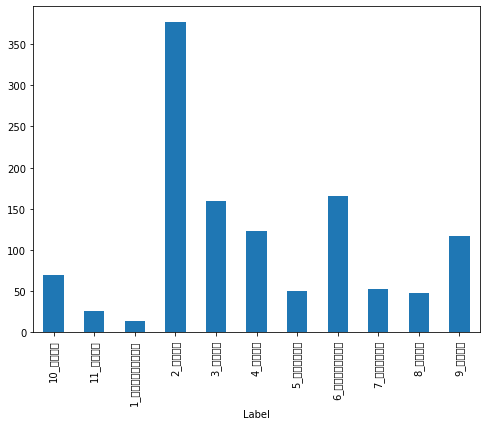

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Label').weibo.count().plot.bar(ylim=0)
plt.show()

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.weibo).toarray()
labels = df.category_id
features.shape

(1203, 2600)

In [56]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# '10_病毒研究':
  . Most correlated unigrams:
       . 疫苗
       . 药物
  . Most correlated bigrams:
       . 新冠 病毒
       . 中国工程院 院士
# '11_工作失职':
  . Most correlated unigrams:
       . 处分
       . 纪委
  . Most correlated bigrams:
       . 党内 警告
       . 纪委 监委
# '1_小区隔离，不能出门':
  . Most correlated unigrams:
       . 封闭
       . 封闭式
  . Most correlated bigrams:
       . 封闭 管理
       . 封闭式 管理
# '2_患病治愈':
  . Most correlated unigrams:
       . 新增
       . 病例
  . Most correlated bigrams:
       . 新增 确诊
       . 确诊 病例
# '3_支援建设':
  . Most correlated unigrams:
       . 医疗队
       . 支援
  . Most correlated bigrams:
       . 支援 湖北
       . 神山 医院
# '4_口罩防护':
  . Most correlated unigrams:
       . 消毒
       . 转存
  . Most correlated bigrams:
       . 扩散 周知
       . 防疫 指南
# '5_造谣售假隐瞒':
  . Most correlated unigrams:
       . 嫌疑人
       . 警方
  . Most correlated bigrams:
       . 抓获 犯罪
       . 犯罪 嫌疑人
# '6_国家政府采取措施':
  . Most correlated unigrams:
       . 启动
       . 退票
  . Most correlated bigrams:
       . 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['weibo'], df['Label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [58]:
print(clf.predict(count_vect.transform(["人民 直播 探访 封闭 管理 中 武汉 居民小区 月 日 武汉市 新冠 肺炎 疫情 防控 指挥部 下发 通知 月 日 全市 住宅小区 封闭 管理工作 封闭 管理 保障 居民 生活 小区 封闭 管理 武汉 貌 直播 ↓ ↓   人民日报 微博 直播       "])))

['6_国家政府采取措施']


In [59]:
print(clf.predict(count_vect.transform(["山西 学校 早于 月 日 开学 日 山西省 教育厅 发布 通知 全省 大中小学 幼儿园 本季 学期 开学 时间 早于 月 日 开学 时间 将视 疫情 防控 情况 综合 研判 另行通知 校外 培训 机构 开学 前 形式 线下 培训 举办 形式 聚集 性 培训 活动 线上 培训 规范 违规 组织 超前 超限 超纲 在线 教学                                     原图                                                           "])))

['8_开学考试']


In [60]:
df[df['weibo'] == "人民 直播 探访 封闭 管理 中 武汉 居民小区 月 日 武汉市 新冠 肺炎 疫情 防控 指挥部 下发 通知 月 日 全市 住宅小区 封闭 管理工作 封闭 管理 保障 居民 生活 小区 封闭 管理 武汉 貌 直播 ↓ ↓   人民日报 微博 直播       "]

,Label,weibo,category_id
40,6_国家政府采取措施,人民 直播 探访 封闭 管理 中 武汉 居民小区 月 日 武汉市 新冠 肺炎 疫情 防控 指...,5


In [61]:
df[df['weibo'] == "山西 学校 早于 月 日 开学 日 山西省 教育厅 发布 通知 全省 大中小学 幼儿园 本季 学期 开学 时间 早于 月 日 开学 时间 将视 疫情 防控 情况 综合 研判 另行通知 校外 培训 机构 开学 前 形式 线下 培训 举办 形式 聚集 性 培训 活动 线上 培训 规范 违规 组织 超前 超限 超纲 在线 教学                                     原图                                                           "]

,Label,weibo,category_id
41,8_开学考试,山西 学校 早于 月 日 开学 日 山西省 教育厅 发布 通知 全省 大中小学 幼儿园 本季...,7


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

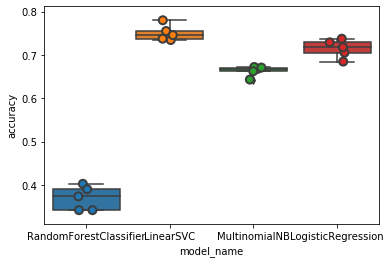

In [63]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [64]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.750609
LogisticRegression        0.714910
MultinomialNB             0.663347
RandomForestClassifier    0.369862
Name: accuracy, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_text(s

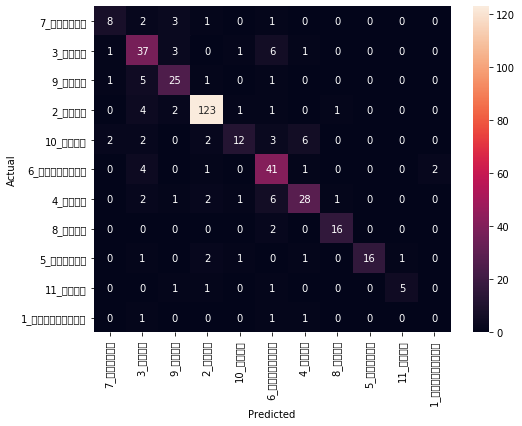

In [66]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [67]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Label', 'weibo']])
      print('')

'3_支援建设' predicted as '6_国家政府采取措施' : 6 examples.


,Label,weibo
425,3_支援建设,国务院 联防 联控 机制 发布会 口罩 企业 复工 率 超过 %# 月 日 全国 重点 省份...
1109,3_支援建设,武汉 全员 排查 发热 病人 武汉 发热 市民 分级分类 就医 武汉市 新型 肺炎 防控 指...
608,3_支援建设,湖北 企业 自产 N 口罩 超万 预计 下周 湖北 N 口罩 可自产 自足 湖北 之声 ...
619,3_支援建设,急需 武汉 金银 潭 医院 汉口 医院 急招 医师 保障 疫情 防控 工作 急需 相关 武汉...
1146,3_支援建设,武汉 新型 肺炎 患者 救治 政府 买单 日 下午 武汉市 新型 冠状病毒 感染 肺炎 疫情...
54,3_支援建设,驻赣 部队 湖北 献血 近万 毫升 月 日 上午 江西省 军区 组织 机关 直属 队名 官兵...



'4_口罩防护' predicted as '6_国家政府采取措施' : 6 examples.


,Label,weibo
622,4_口罩防护,国家 卫健委 发布 新冠 肺炎 防治 营养 膳食 指导 中国 营养 学会 联合 中国 医师 ...
723,4_口罩防护,武汉 全民 体温 监测 上门 排查 自查 报 相结合 武汉市 即日起 全民 体温 监测 工作...
533,4_口罩防护,全国 口罩 企业 复工 复产率 %# 国务院 联防 联控 机制 发布会 国家 发展 改革 委...
610,4_口罩防护,口罩 防疫 物资 生产商 加油 生产 别有 后顾之忧 疫情 加大 企业 复产 保障 力度...
452,4_口罩防护,北京 发布 条 社区 防控 举措 北京 迎来 返京 人员 流动 高峰 近日 发布 通告 进一...
660,4_口罩防护,国家 市场监管 总局 口罩 制假 售假 顶格 处罚 哄抬物价 处罚 国家 市场监管 总局 月...



'10_病毒研究' predicted as '4_口罩防护' : 6 examples.


,Label,weibo
1175,10_病毒研究,钟南山 解读 新型 冠状病毒 肺炎 疫情 疫情 进展 情况 重复 SARS 疫情 钟南山 肯...
1136,10_病毒研究,重点 关注 新型 冠状病毒 酒精 耐高温 武汉 同济 医院 感染 科主任 宁琴 解读 新型 ...
717,10_病毒研究,转扩 新冠 肺炎 真相 新型 冠状病毒 人会 传染 感染 症状 潜伏期 传染 预防 特效药 ...
65,10_病毒研究,九图 血浆 治疗 新冠 肺炎 患者 适合 血浆 治疗 血浆 治疗 临床 效果 风险 捐 血浆...
667,10_病毒研究,钟南山 建议 医护人员 轮休 钟南山 提醒 医护人员 规范 防护 日 下午 钟南山 院士 接...
1176,10_病毒研究,钟南山 肯定 新型 冠状病毒 肺炎 传人 钟南山 资料 新型 冠状病毒 肺炎 肯定 传人 广...


In [68]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [69]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# '10_病毒研究':
  . Top unigrams:
       . 研究
       . 药物
  . Top bigrams:
       . 核酸 检测
       . 中国工程院 院士
# '11_工作失职':
  . Top unigrams:
       . 征用
       . 大理
  . Top bigrams:
       . 纪委 监委
       . 失职 失责
# '1_小区隔离，不能出门':
  . Top unigrams:
       . 小区
       . 管理
  . Top bigrams:
       . 封闭式 管理
       . 管控 措施
# '2_患病治愈':
  . Top unigrams:
       . 病例
       . 出院
  . Top bigrams:
       . 聚集 疫情
       . 确诊 病例
# '3_支援建设':
  . Top unigrams:
       . 建设
       . 驰援
  . Top bigrams:
       . 支援 湖北
       . 武汉 方舱
# '4_口罩防护':
  . Top unigrams:
       . 消毒
       . 口罩
  . Top bigrams:
       . 疾控中心 研究员
       . 病例 北京
# '5_造谣售假隐瞒':
  . Top unigrams:
       . 隐瞒
       . 辟谣
  . Top bigrams:
       . 犯罪 嫌疑人
       . 危害 公共安全
# '6_国家政府采取措施':
  . Top unigrams:
       . 免费
       . 恢复
  . Top bigrams:
       . 疫情 防控
       . 疫情 期间
# '7_期盼战胜疫情':
  . Top unigrams:
       . 春暖花开
       . 加油
  . Top bigrams:
       . 医院 医生
       . 加油 人民日报
# '8_开学考试':
  . Top unigrams:
       . 教育部
       . 学生
  . Top

In [70]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: '6_国家政府采取措施'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: '6_国家政府采取措施'

"I can't get the money out of the country."
  - Predicted as: '6_国家政府采取措施'

"I have no money to pay my tuition"
  - Predicted as: '6_国家政府采取措施'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: '6_国家政府采取措施'



In [71]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Label'].unique()))

              precision    recall  f1-score   support

    7_期盼战胜疫情       0.67      0.53      0.59        15
      3_支援建设       0.64      0.76      0.69        49
      9_致敬一线       0.71      0.76      0.74        33
      2_患病治愈       0.92      0.93      0.93       132
     10_病毒研究       0.75      0.44      0.56        27
  6_国家政府采取措施       0.65      0.84      0.73        49
      4_口罩防护       0.74      0.68      0.71        41
      8_开学考试       0.89      0.89      0.89        18
    5_造谣售假隐瞒       1.00      0.73      0.84        22
     11_工作失职       0.83      0.62      0.71         8
 1_小区隔离，不能出门       0.00      0.00      0.00         3

    accuracy                           0.78       397
   macro avg       0.71      0.65      0.67       397
weighted avg       0.79      0.78      0.78       397

